## The Battle of the Neighborhoods: Cape Town

### Import python packages and libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

### Download the Cape Town suburb data

In [3]:
df_CapeTown = pd.read_csv('CTdata.csv')
df_CapeTown

,Area,Suburb,Street Code,Crime,Latitude,Longitude,Kilometer to hospital
0,Atlantic Seaboard,Hout Bay,7806,695,-34.0253,18.3742,12.4
1,Atlantic Seaboard,Camps Bay,8005,84,-33.9513,18.3831,3.1
2,Atlantic Seaboard,Sea Point,8005,291,-33.9169,18.3875,2.9
3,Cape Flats,Delft,7100,3491,-33.9744,18.6426,10.0
4,Cape Flats,Macassar,7130,883,-34.0522,18.7542,18.0
5,Cape Flats,Langa,7455,1371,-33.9447,18.5323,12.7
6,Cape Flats,Elsie's River,7490,1770,-33.9309,18.5772,4.6
7,Cape Flats,Bishop Lavis,7490,2104,-33.9479,18.5790,13.3
8,Cape Flats,Philippi,7750,1053,-34.0188,18.5634,8.3
9,Cape Flats,Gugulethu,7750,2082,-33.9820,18.5671,17.3


In [4]:
df_CapeTown.shape

(53, 7)

### Find the co-ordinates of Cape Town

In [5]:
import warnings
warnings.filterwarnings('ignore')
address = 'Cape Town'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Cape Town are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Cape Town are -33.928992, 18.417396.


### Create a map of Cape Town suburbs using folium

In [6]:
map_CapeTown = folium.Map(location=[latitude_x, longitude_y], zoom_start=9)

# add markers to map
for lat, lng, suburb in zip(df_CapeTown['Latitude'], df_CapeTown['Longitude'], df_CapeTown['Suburb']):
    
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CapeTown)  
    
map_CapeTown

### Define foursquare credentials

In [7]:
CLIENT_ID = 'BIIBUQRREWBKC5NRKY0CN133WZO42X30GUNYNN0J3MRELSC3' # your Foursquare ID
CLIENT_SECRET = 'NDTHYGFORVAOZOJL4UVUX332C1TGIPDNCWGHYOCL40F3QIRL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BIIBUQRREWBKC5NRKY0CN133WZO42X30GUNYNN0J3MRELSC3
CLIENT_SECRET:NDTHYGFORVAOZOJL4UVUX332C1TGIPDNCWGHYOCL40F3QIRL


In [8]:
address = 'Cape Town'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are -33.928992, 18.417396.


### Search for the most popular venues in each suburb

In [9]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [10]:
results = requests.get(url).json()

In [11]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.neighborhood',
       'venue.venuePage.id'],
      dtype='object')

In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(10)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,South African Jewish Museum,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",-33.930046,18.416916
1,South African National Art Gallery,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",-33.928929,18.417033
2,The Company's Garden,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",-33.926615,18.417031
3,Roxy's Café,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",-33.931779,18.417065
4,The Book Lounge,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",-33.929306,18.421688
5,Royale Eatery,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",-33.926425,18.414894
6,Maria's,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",-33.931442,18.416777
7,iziko South African Museum,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",-33.928656,18.415298
8,Lola's Café,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",-33.926067,18.415059
9,African Pride 15 On Orange Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",-33.928587,18.414108


In [14]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,South African Jewish Museum,Museum,-33.930046,18.416916
1,South African National Art Gallery,Art Museum,-33.928929,18.417033
2,The Company's Garden,Park,-33.926615,18.417031
3,Roxy's Café,Pub,-33.931779,18.417065
4,The Book Lounge,Bookstore,-33.929306,18.421688
5,Royale Eatery,Burger Joint,-33.926425,18.414894
6,Maria's,Greek Restaurant,-33.931442,18.416777
7,iziko South African Museum,Museum,-33.928656,18.415298
8,Lola's Café,Café,-33.926067,18.415059
9,African Pride 15 On Orange Hotel,Hotel,-33.928587,18.414108


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
CapeTown_venues = getNearbyVenues(names=df_CapeTown['Suburb'],
                                   latitudes=df_CapeTown['Latitude'],
                                   longitudes=df_CapeTown['Longitude']
                                  )

In [17]:
CapeTown_venues.head(10)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hout Bay,-34.0253,18.3742,Massimo's,-34.019204,18.375360,Italian Restaurant
1,Hout Bay,-34.0253,18.3742,The Clay Cafe,-34.020953,18.378839,Café
2,Hout Bay,-34.0253,18.3742,KWIKSPAR Oakhurst,-34.019351,18.375739,Convenience Store
3,Hout Bay,-34.0253,18.3742,Pet Plus Vet Store,-34.019234,18.375927,Pet Store
4,Hout Bay,-34.0253,18.3742,Oakhurst Farm Stall,-34.019177,18.375702,Convenience Store
5,Camps Bay,-33.9513,18.3831,POD Camps Bay,-33.949245,18.379686,Hotel
6,Camps Bay,-33.9513,18.3831,Sea Five Camps Bay,-33.950996,18.381147,Hotel
7,Camps Bay,-33.9513,18.3831,Vide E Caffe,-33.951006,18.378343,Coffee Shop
8,Camps Bay,-33.9513,18.3831,Camps Bay Beach,-33.950605,18.377745,Beach
9,Camps Bay,-33.9513,18.3831,Kauai,-33.951098,18.378399,Deli / Bodega


In [18]:
CapeTown_venues.groupby('Suburb').count().head()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Athlone,3,3,3,3,3,3
Belhar,5,5,5,5,5,5
Bellville,9,9,9,9,9,9
Bishop Lavis,2,2,2,2,2,2
Bothasig,2,2,2,2,2,2


In [19]:
print('There are {} uniques categories.'.format(len(CapeTown_venues['Venue Category'].unique())))

There are 136 uniques categories.


In [20]:
# One hot encoding

CapeTown_onehot = pd.get_dummies(CapeTown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CapeTown_onehot['Suburb'] = CapeTown_venues['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [CapeTown_onehot.columns[-1]] + list(CapeTown_onehot.columns[:-1])
CapeTown_onehot = CapeTown_onehot[fixed_columns]
CapeTown_onehot.head()

,Suburb,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,City Hall,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Factory,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flea Market,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Laundry Service,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Office,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Photography Lab,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Resort,Restaurant,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Hout Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hout Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hout Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hout Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hout Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
CapeTown_onehot.shape

(446, 137)

In [22]:
CapeTown_grouped = CapeTown_onehot.groupby('Suburb').mean().reset_index()
CapeTown_grouped.head()

,Suburb,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,City Hall,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Factory,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flea Market,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Laundry Service,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Office,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Photography Lab,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Resort,Restaurant,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Athlone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Belhar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2
2,Bellville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0
3,Bishop Lavis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0

In [23]:
CapeTown_grouped.shape

(45, 137)

In [24]:
num_top_venues = 5
for hood in CapeTown_grouped['Suburb'][:3]:
    print("----"+hood+"----")
    temp = CapeTown_grouped[CapeTown_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Athlone----
                   venue  freq
0    Sporting Goods Shop  0.33
1  Outdoors & Recreation  0.33
2   Fast Food Restaurant  0.33
3           Noodle House  0.00
4      Mobile Phone Shop  0.00


----Belhar----
                venue  freq
0       Women's Store   0.2
1  Athletics & Sports   0.2
2       Deli / Bodega   0.2
3  Seafood Restaurant   0.2
4         Gas Station   0.2


----Bellville----
                    venue  freq
0         Automotive Shop  0.11
1                   Trail  0.11
2  Furniture / Home Store  0.11
3             Gas Station  0.11
4               Nightclub  0.11




In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Suburb'] = CapeTown_grouped['Suburb']

for ind in np.arange(CapeTown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CapeTown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athlone,Sporting Goods Shop,Fast Food Restaurant,Outdoors & Recreation,Ethiopian Restaurant,Fishing Store,Fish & Chips Shop,Factory,Fabric Shop,Event Space,Electronics Store
1,Belhar,Women's Store,Athletics & Sports,Seafood Restaurant,Gas Station,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Ethiopian Restaurant
2,Bellville,Convenience Store,Electronics Store,Breakfast Spot,Furniture / Home Store,Automotive Shop,Athletics & Sports,Nightclub,Gas Station,Trail,Ethiopian Restaurant
3,Bishop Lavis,Fried Chicken Joint,Café,Women's Store,Event Space,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Ethiopian Restaurant
4,Bothasig,Flower Shop,Burger Joint,Fabric Shop,Flea Market,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Women's Store,Convenience Store


### Cluster the neighbourhoods

In [27]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

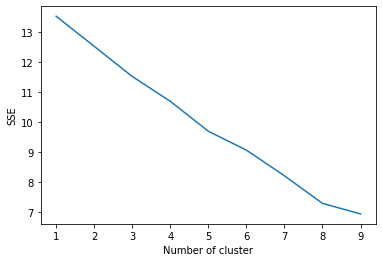

In [28]:
CapeTown_grouped_clustering = CapeTown_grouped.drop('Suburb', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(CapeTown_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [29]:
kclusters = 4

CapeTown_grouped_clustering = CapeTown_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CapeTown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1], dtype=int32)

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

CapeTown_merged = df_CapeTown

CapeTown_merged = CapeTown_merged.join(neighborhoods_venues_sorted.set_index('Suburb'), on='Suburb')

CapeTown_merged.head() 

,Area,Suburb,Street Code,Crime,Latitude,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic Seaboard,Hout Bay,7806,695,-34.0253,18.3742,12.4,1.0,Convenience Store,Café,Pet Store,Italian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Dance Studio
1,Atlantic Seaboard,Camps Bay,8005,84,-33.9513,18.3831,3.1,1.0,Hotel,Restaurant,Seafood Restaurant,Beach,Ice Cream Shop,Italian Restaurant,Café,Pizza Place,Japanese Restaurant,Bistro
2,Atlantic Seaboard,Sea Point,8005,291,-33.9169,18.3875,2.9,1.0,Hotel,Pizza Place,Burger Joint,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Grocery Store,Shopping Mall,Indian Restaurant
3,Cape Flats,Delft,7100,3491,-33.9744,18.6426,10.0,1.0,Antique Shop,Fast Food Restaurant,Women's Store,Event Space,Flea Market,Fishing Store,Fish & Chips Shop,Factory,Fabric Shop,Ethiopian Restaurant
4,Cape Flats,Macassar,7130,883,-34.0522,18.7542,18.0,1.0,Burger Joint,Fast Food Restaurant,Gas Station,Women's Store,Fabric Shop,Fishing Store,Fish & Chips Shop,Factory,Event Space,Flower Shop


In [31]:
CapeTown_merged = CapeTown_merged.dropna()
CapeTown_merged['Cluster Labels'] = CapeTown_merged['Cluster Labels'].astype(int)

### Create a map of clustered suburbs in Cape Town

In [32]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(CapeTown_merged['Latitude'], CapeTown_merged['Longitude'], CapeTown_merged['Suburb'], CapeTown_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


### Examine each of the clusters

In [33]:
# Cluster 1
df1=CapeTown_merged.loc[CapeTown_merged['Cluster Labels'] == 0,CapeTown_merged.columns[[1] + list(range(5, CapeTown_merged.shape[1]))]]
df1

,Suburb,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Langa,18.5323,12.7,0,Liquor Store,Women's Store,Event Space,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Ethiopian Restaurant,Flower Shop


In [34]:
# Cluster 2
df2=CapeTown_merged.loc[CapeTown_merged['Cluster Labels'] == 1,CapeTown_merged.columns[[1] + list(range(5, CapeTown_merged.shape[1]))]]
df2

,Suburb,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hout Bay,18.3742,12.4,1,Convenience Store,Café,Pet Store,Italian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Dance Studio
1,Camps Bay,18.3831,3.1,1,Hotel,Restaurant,Seafood Restaurant,Beach,Ice Cream Shop,Italian Restaurant,Café,Pizza Place,Japanese Restaurant,Bistro
2,Sea Point,18.3875,2.9,1,Hotel,Pizza Place,Burger Joint,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Grocery Store,Shopping Mall,Indian Restaurant
3,Delft,18.6426,10.0,1,Antique Shop,Fast Food Restaurant,Women's Store,Event Space,Flea Market,Fishing Store,Fish & Chips Shop,Factory,Fabric Shop,Ethiopian Restaurant
4,Macassar,18.7542,18.0,1,Burger Joint,Fast Food Restaurant,Gas Station,Women's Store,Fabric Shop,Fishing Store,Fish & Chips Shop,Factory,Event Space,Flower Shop
6,Elsie's River,18.5772,4.6,1,Gas Station,Grocery Store,Café,Women's Store,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Event Space
7,Bishop Lavis,18.5790,13.3,1,Fried Chicken Joint,Café,Women's Store,Event Space,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Ethiopian Restaurant
8,Philippi,18.5634,8.3,1,Business Service,Event Space,Flea Market,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Women's Store,Convenience Store
9,Gugulethu,18.5671,17.3,1,ATM,African Restaurant,Grocery Store,Shopping Mall,Event Space,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop
11,Athlone,18.5032,9.1,1,Sporting Goods Shop,Fast Food Restaurant,Outdoors & Recreation,Ethiopian Restaurant,Fishing Store,Fish & Chips Shop,Factory,Fabric Shop,Event Space,Electronics Store


In [35]:
# Cluster 3
df3=CapeTown_merged.loc[CapeTown_merged['Cluster Labels'] == 2,CapeTown_merged.columns[[1] + list(range(5, CapeTown_merged.shape[1]))]]
df3

,Suburb,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Melkbosstrand,18.4543,27.9,2,Dance Studio,Women's Store,Event Space,Flea Market,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Ethiopian Restaurant


In [36]:
# Cluster 4 
df4=CapeTown_merged.loc[CapeTown_merged['Cluster Labels'] == 3,CapeTown_merged.columns[[1] + list(range(5, CapeTown_merged.shape[1]))]]
df4

,Suburb,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Strandfontein,18.573,10.0,3,Pharmacy,Ethiopian Restaurant,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Factory,Fabric Shop,Event Space,Electronics Store,Hardware Store


### Convert the clusters data into a dataframe

In [37]:
clusters=pd.DataFrame({"Cluster 1":df1["Suburb"],
                      "Cluster 2":df2["Suburb"],
                      "Cluster 3":df3["Suburb"],
                      "Cluster 4":df4["Suburb"],
                      })

In [38]:
clusters = clusters.replace(np.nan, '', regex=True)
clusters

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,,Hout Bay,,
1,,Camps Bay,,
2,,Sea Point,,
3,,Delft,,
4,,Macassar,,
5,Langa,,,
6,,Elsie's River,,
7,,Bishop Lavis,,
8,,Philippi,,
9,,Gugulethu,,


In [39]:
new_CapeTown = CapeTown_merged.set_index("Suburb",drop=True)
new_CapeTown.head()

,Area,Street Code,Crime,Latitude,Longitude,Kilometer to hospital,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Suburb,,,,,,,,,,,,,,,,,
Hout Bay,Atlantic Seaboard,7806,695,-34.0253,18.3742,12.4,1,Convenience Store,Café,Pet Store,Italian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Electronics Store,Dance Studio
Camps Bay,Atlantic Seaboard,8005,84,-33.9513,18.3831,3.1,1,Hotel,Restaurant,Seafood Restaurant,Beach,Ice Cream Shop,Italian Restaurant,Café,Pizza Place,Japanese Restaurant,Bistro
Sea Point,Atlantic Seaboard,8005,291,-33.9169,18.3875,2.9,1,Hotel,Pizza Place,Burger Joint,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Grocery Store,Shopping Mall,Indian Restaurant
Delft,Cape Flats,7100,3491,-33.9744,18.6426,10.0,1,Antique Shop,Fast Food Restaurant,Women's Store,Event Space,Flea Market,Fishing Store,Fish & Chips Shop,Factory,Fabric Shop,Ethiopian Restaurant
Macassar,Cape Flats,7130,883,-34.0522,18.7542,18.0,1,Burger Joint,Fast Food Restaurant,Gas Station,Women's Store,Fabric Shop,Fishing Store,Fish & Chips Shop,Factory,Event Space,Flower Shop


In [40]:
CapeTown_crime = df_CapeTown[['Suburb','Crime']].set_index("Suburb",drop=True)

In [41]:
CapeTown_crime.head()

,Crime
Suburb,
Hout Bay,695
Camps Bay,84
Sea Point,291
Delft,3491
Macassar,883


In [42]:
distance_to_hospital = df_CapeTown[['Suburb','Kilometer to hospital']].set_index("Suburb",drop=True)
distance_to_hospital.head()

,Kilometer to hospital
Suburb,
Hout Bay,12.4
Camps Bay,3.1
Sea Point,2.9
Delft,10.0
Macassar,18.0


### Load Cape Town population demographic data

In [43]:
new_CapeTown_population=pd.DataFrame({
   
    "White":[25788,22334,21455,1443,1247,445,464,764,734,1334,7556,4141,4141,638,668,3597,3597,1093,1618,1718,1763,1763,253,2253,1855,447,2585,1040,1705,8667, 547, 696,5642,9407, 11360, 23552,21888,9888, 9754,11592,12592,11592,2633, 26433,1353,1353,655,1051,1051,236,236,666],
"Black":[8667, 547, 696,5642,9407, 11360, 23552,21888,9888, 9754,11592,12592,11592,23633, 26433,18353,14353,8655,10051,11051,4236,3236,7666,8666,12333,1039,3531,5594,474,4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 15065,7887,4887,9869],
"Coloured":[4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 2949,2949, 2078, 2078,1043,1065, 1065,887,5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,9808,13010,13055,869],
 "Asian": [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,5057,2098,6656,7429,1748,1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,408,924,5309,3912,1657,1288],
}
)
new_CapeTown_population.head()

,White,Black,Coloured,Asian
0,25788,8667,4455,5666
1,22334,547,1213,8977
2,21455,696,1667,3445
3,1443,5642,2544,6040
4,1247,9407,5670,4279


In [44]:
new_CapeTown_population["Suburb"]=CapeTown_merged["Suburb"]


In [45]:
new_CapeTown_population

,White,Black,Coloured,Asian,Suburb
0,25788,8667,4455,5666,Hout Bay
1,22334,547,1213,8977,Camps Bay
2,21455,696,1667,3445,Sea Point
3,1443,5642,2544,6040,Delft
4,1247,9407,5670,4279,Macassar
5,445,11360,4381,15539,Langa
6,464,23552,2089,6140,Elsie's River
7,764,21888,907,1465,Bishop Lavis
8,734,9888,888,1465,Philippi
9,1334,9754,1212,2176,Gugulethu


### Create a barplot of demographics

In [46]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
chart_studio.tools.set_credentials_file(username='aavanwyk74', api_key='abI95ScMW2QjfPTooDOE')

x = df_CapeTown["Suburb"]

y1 = [25788,22334,21455,1443,1247,445,464,764,734,1334,7556,4141,4141,638,668,3597,3597,1093,1618,1718,1763,1763,253,2253,1855,447,2585,1040,1705,8667, 547, 696,5642,9407, 11360, 23552,21888,9888, 9754,11592,12592,11592,2633, 26433,1353,1353,655,1051,1051,236,236,666]
y2 = [8667, 547, 696,5642,9407, 11360, 23552,21888,9888, 9754,11592,12592,11592,23633, 26433,18353,14353,8655,10051,11051,4236,3236,7666,8666,12333,1039,3531,5594,474,4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065,  15065,7887,4887,9869]
y3 = [4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 2949,2949, 2078, 2078,1043,1065, 1065,887,5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,9808,13010,13055,869]
y4 =  [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,5057,2098,6656,7429,1748,1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,408,924,5309,3912,1657,1288]

trace1 = go.Bar(
    x=x,
    y=y1,
    name="White",
    textposition = 'auto',
    marker=dict(
        color= "red",
        line=dict(
            color="red",
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    name="Black",
    textposition = 'auto',
    marker=dict(
        color='blue',
        line=dict(
            color='blue',
            width=1.5),
        ),
    opacity=0.6
)

trace3 = go.Bar(
    x=x,
    y=y3,
    name="Coloured",
    textposition = 'auto',
    marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5),
        ),
    opacity=0.6
)
trace4 = go.Bar(
    x=x,
    y=y4,
    name="Asian",
    textposition = 'auto',
    marker=dict(
        color='yellow',
        line=dict(
            color='yellow',
            width=1.5),
        ),
    opacity=0.6
)
data = [trace1,trace2,trace3,trace4]

py.plot(data, filename='grouped-bar-direct-labels')

ModuleNotFoundError: No module named 'plotly'

In [47]:
new_CapeTown_population["Suburb"]=CapeTown_merged["Suburb"]
new_CapeTown_population1=new_CapeTown_population.set_index("Suburb")
new_CapeTown_population1.head()

,White,Black,Coloured,Asian
Suburb,,,,
Hout Bay,25788,8667,4455,5666
Camps Bay,22334,547,1213,8977
Sea Point,21455,696,1667,3445
Delft,1443,5642,2544,6040
Macassar,1247,9407,5670,4279


### Let's compare 2 neighborhoods to choose one that best matches our requirements as given below:

#### 1. More Asian Population
#### 2. Closer to hospital
#### 3. Low crime rate
#### 4. Desirable venues nearby

#### Here, we are comparing Sea Point and Muizenberg, for example

In [48]:
Suburb1=input("Enter the Suburb: ")

Enter the Suburb:  Sea Point


In [49]:
Suburb2=input("Enter the Suburb: ")


Enter the Suburb:  Muizenberg


### Take a look at the most popular venues in each suburb

In [50]:
Venue_comparison=new_CapeTown.loc[[Suburb1,Suburb2]].T
Venue_comparison[7:17]

Suburb,Sea Point,Muizenberg
1st Most Common Venue,Hotel,Coffee Shop
2nd Most Common Venue,Pizza Place,Event Space
3rd Most Common Venue,Burger Joint,Flea Market
4th Most Common Venue,Coffee Shop,Fishing Store
5th Most Common Venue,Sushi Restaurant,Fish & Chips Shop
6th Most Common Venue,Italian Restaurant,Fast Food Restaurant
7th Most Common Venue,Restaurant,Factory
8th Most Common Venue,Grocery Store,Fabric Shop
9th Most Common Venue,Shopping Mall,Ethiopian Restaurant
10th Most Common Venue,Indian Restaurant,Convenience Store


### Compare the distances to nearest hospital

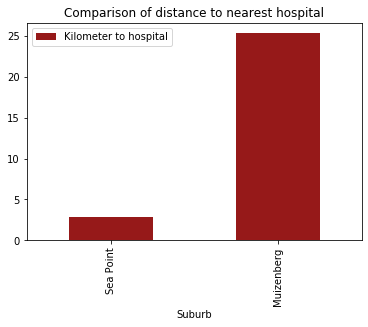

In [51]:
hospital_comparison=distance_to_hospital.loc[[Suburb1,Suburb2]]
hospital_comparison.plot(kind='bar',alpha=0.9,color='darkred',title="Comparison of distance to nearest hospital");
plt.show()

### Compare the crime rate

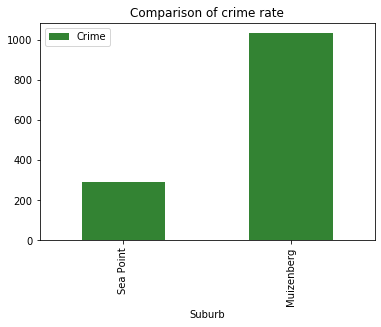

In [52]:
crime_comparison=CapeTown_crime.loc[[Suburb1,Suburb2]]
crime_comparison.plot(kind='bar',alpha=0.8,color='darkgreen',title="Comparison of crime rate");
plt.show()

### Compare the population demographics

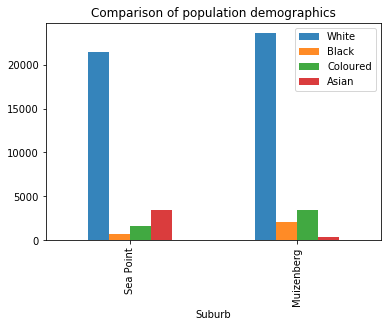

In [53]:
Population_Comparison=new_CapeTown_population1.loc[[Suburb1,Suburb2]]
Population_Comparison.plot(kind='bar',alpha=0.9,title="Comparison of population demographics")
plt.show()